# PHP - Pulsating Heat Pipe [DI, 60FR, Atm]

In [1]:
from analysis import PulseHeatPipe
from analysis import DataVisualisation

In [2]:
analysis = PulseHeatPipe("data/di_water_exp_atm/60_FR/")

Data loaded from directory: data/di_water_exp_atm/60_FR/


In [3]:
df, df_conv = analysis.data_etl()

Compiled and converted data is saved at: data/di_water_exp_atm/60_FR/'combined_converted_data.csv'


In [4]:
df_gfe = analysis.gibbs_fe(df_conv)

Gibbs Free Energy calculated data saved at: data/di_water_exp_atm/60_FR/'gfe_combined.csv


In [5]:
df_gfe

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,0.0,296.82,295.90,0.92,1.013250,0.011458,32.482067,32.381388,0.100679
1,0.5,297.15,295.40,1.75,1.013250,0.021875,32.518180,32.326672,0.191509
2,1.0,299.48,296.15,3.33,1.013250,0.041667,32.773160,32.408747,0.364414
3,1.5,301.48,296.40,5.08,1.013250,0.063542,32.992028,32.436105,0.555922
4,2.0,302.82,296.40,6.42,1.013250,0.080208,33.138669,32.436105,0.702563
...,...,...,...,...,...,...,...,...,...
96,48.0,371.15,336.40,34.75,1.994502,0.434375,2130.378032,1930.915182,199.462850
97,48.5,371.15,337.15,34.00,2.042498,0.425000,2203.754461,2001.874759,201.879703
98,49.0,371.15,337.15,34.00,2.042498,0.425000,2203.754461,2001.874759,201.879703
99,49.5,371.48,337.40,34.08,2.042498,0.426042,2205.713882,2003.359168,202.354714


In [6]:
visual = DataVisualisation('DI_WATER_60FR_Atm')

Data loaded from directory: DI_WATER_60FR_Atm


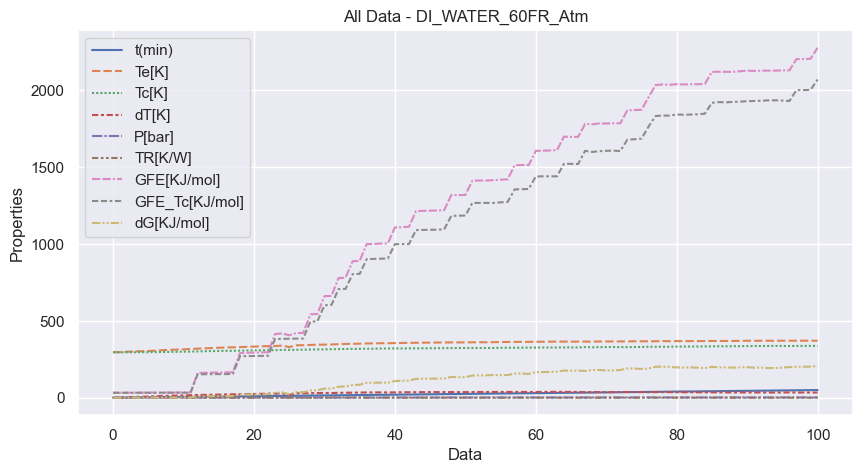

In [7]:
visual.plot_all_data(df_gfe)

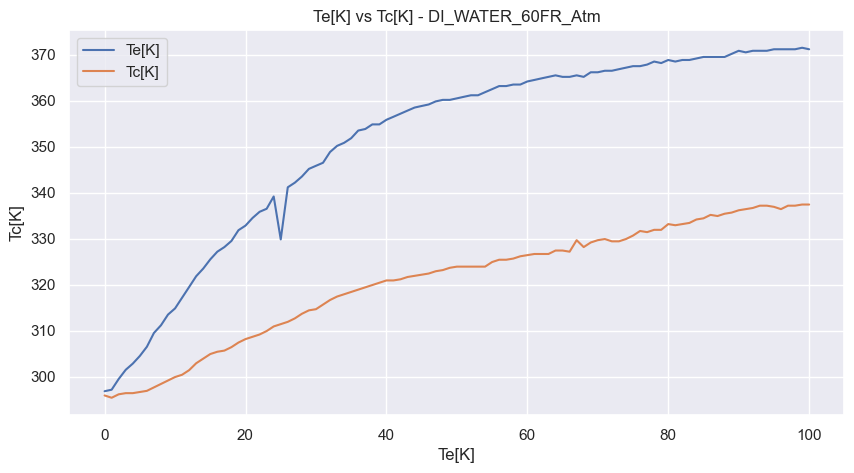

In [8]:
visual.plot_Te_Tc(df_gfe)

In [9]:
df_selected =  analysis.data_chop(df_gfe)    

Optimal range of temperature(Te) for data selection: [Tmin:296.82, Tmax:371]


In [10]:
df_mean, df_std = analysis.data_stat(df_selected)

Calculated mean and standard deviation values saved at data/di_water_exp_atm/60_FR/'combined_mean.csv' and 'combined_std.csv'


In [11]:
df_mean

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,301.48,1.500,296.400,5.080,1.013250,0.063542,32.992028,32.436105,0.555922
1,302.82,2.000,296.400,6.420,1.013250,0.080208,33.138669,32.436105,0.702563
2,304.48,2.500,296.650,7.830,1.013250,0.097917,33.320328,32.463463,0.856865
3,306.48,3.000,296.900,9.580,1.013250,0.119792,33.539195,32.490822,1.048373
4,309.48,3.500,297.650,11.830,1.013250,0.147917,33.867496,32.572897,1.294599
...,...,...,...,...,...,...,...,...,...
68,370.15,44.500,335.650,34.500,1.994502,0.431250,2124.638094,1926.610229,198.027865
69,370.48,45.500,336.400,34.080,1.994502,0.426042,2126.532273,1930.915182,195.617091
70,370.82,46.125,336.775,34.045,1.994502,0.425521,2128.483852,1933.067659,195.416193
71,371.15,48.600,337.000,34.150,2.033165,0.426875,2189.131763,1987.750419,201.381344


In [12]:
analysis.data_property_avg(df_mean, df_std)

Tc  average:     318.1525 +- 0.4551 [K]
P   average:     1.4461 +- 0.0123 [bar]
dT  average:     29.8741 +- 0.4551 [K]
TR  average:     0.3734 +- 0.0057 [K/W]
GFE average:     1025.515 +- 20.6933 [KJ/mol]



In [13]:
analysis.best_TP(df_mean)

Optimal G(T,P) condition at lowest (optimal) dG[0.5559]
Te optimal:        301.48[K] 
P  optimal:        1.0132[bar] 
dT optimal:        5.08[K] 
TR optimal:        0.0635[K/W] 
GFE optimal:       dG(301.48, 1.0132) = 32.992 [KJ/mol]



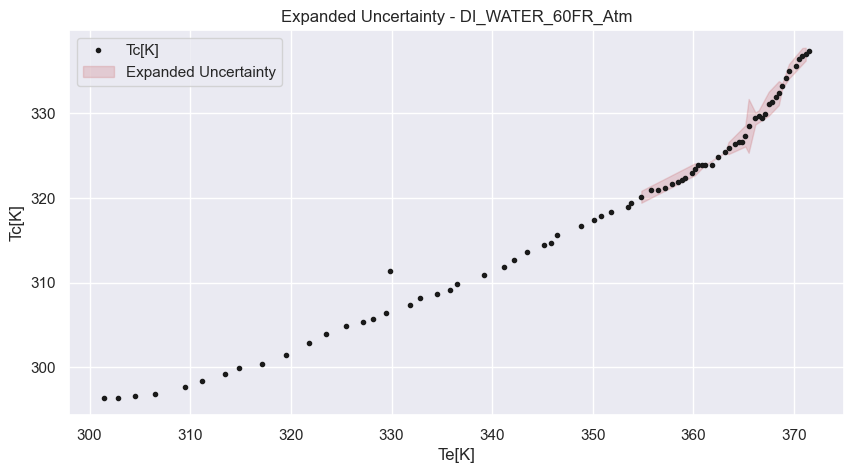

In [14]:
visual.plot_eu(df_mean, df_std, 'Tc[K]')

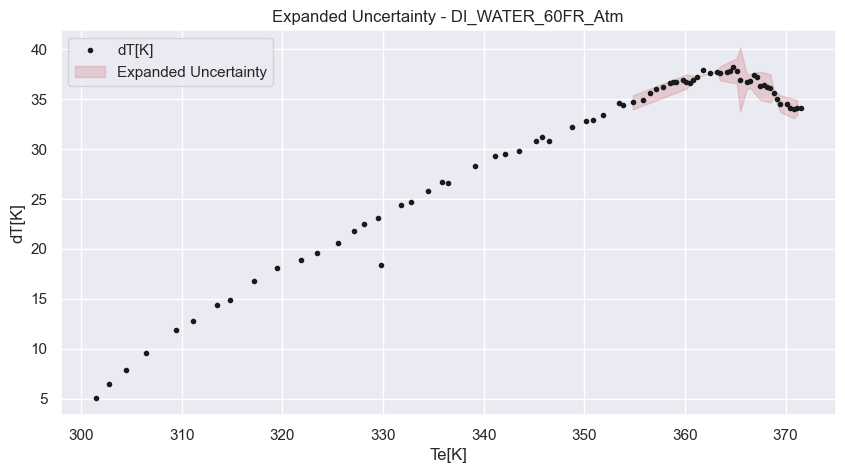

In [15]:
visual.plot_eu(df_mean, df_std, 'dT[K]')

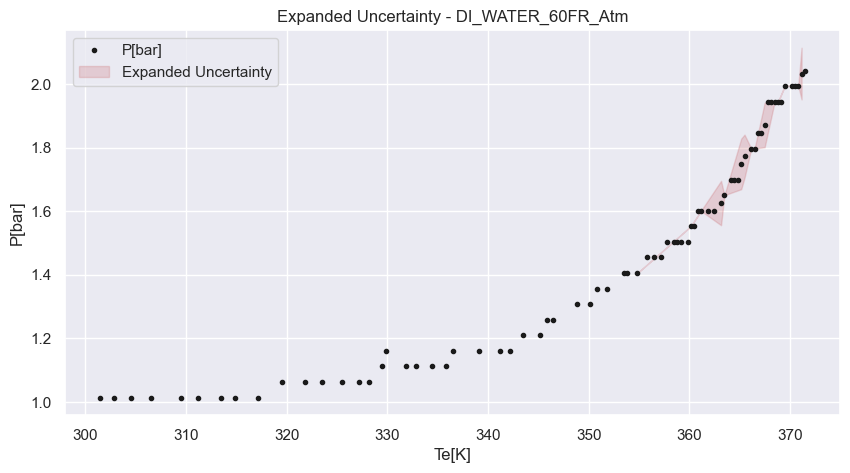

In [16]:
visual.plot_eu(df_mean, df_std, 'P[bar]')

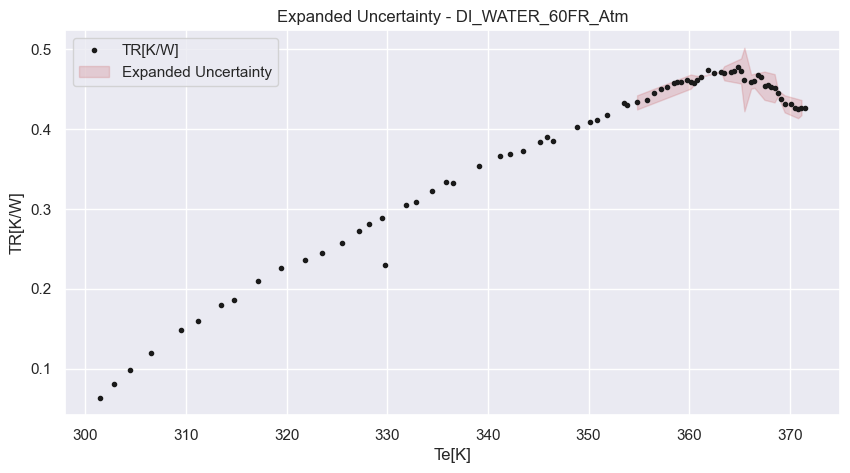

In [17]:
visual.plot_eu(df_mean, df_std, 'TR[K/W]')

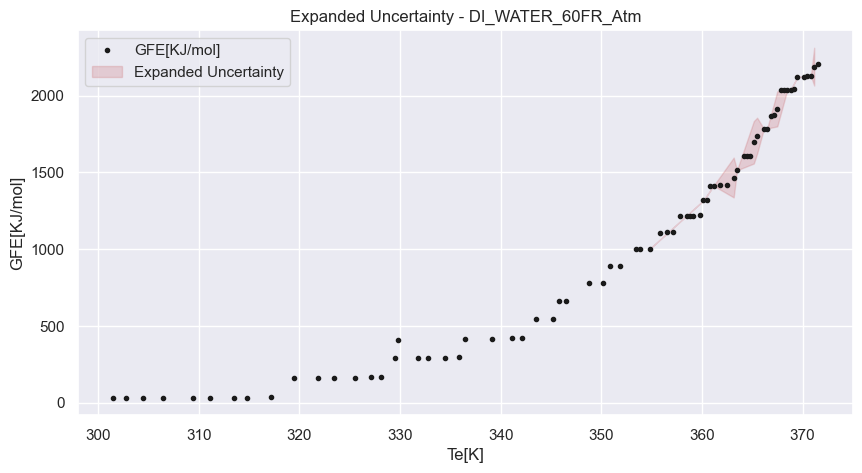

In [18]:
visual.plot_eu(df_mean, df_std, 'GFE[KJ/mol]')

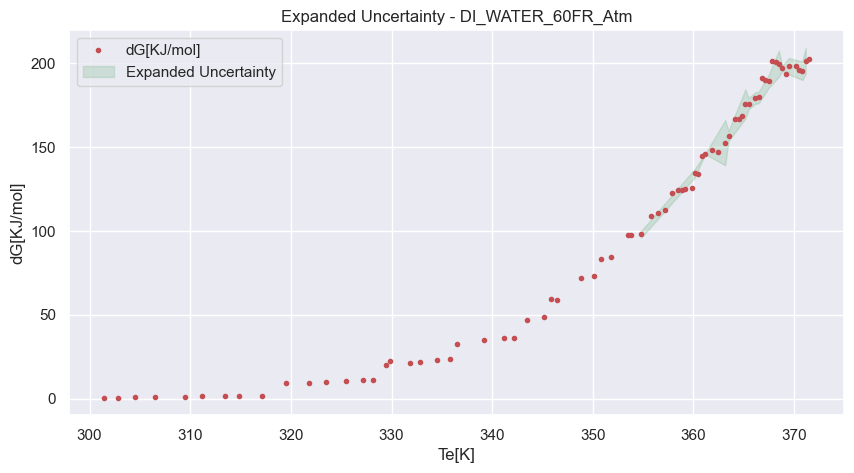

In [19]:
visual.plot_eu(df_mean, df_std, 'dG[KJ/mol]','.r','g')